Mit Binder oder Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opendatazurich/opendatazurich.github.io/master?filepath=rpk-api/RPK-API-Beispiele.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opendatazurich/opendatazurich.github.io/blob/master/rpk-api/RPK-API-Beispiele.ipynb)


# Python-Beispiele für RPK-API

This notebook contains some examples to show how to work with the RPK API.
Dieses Notebook beinhaltet einige Python-Beispiele, die zeigen, wie man mit der RPK-API arbeiten kann.

Inhaltsverzeichnis:

1. [Modell](#Modell)
1. [Departemente und Institutionen abfragen](#Departemente-und-Institutionen-abfragen)
1. [Konten abfragen (HRM-1)](#Konten-abfragen-(HRM-1))
1. [Neue Rechnungslegung (HRM2)](#Neue-Rechnungslegung-(HRM2))
1. [Visualisierung der Daten](#Visualisierung-der-Daten)


# Modell
Wichtig für das Verständnis ist das zugrunde liegende Modell, welches die Entitäten und deren Zusammenhänge erklärt:

![Modell der Entitäten des RPK-APIs](model.png)

In [1]:
%pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [478]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [79]:
def clean_nested_dicts(nested, key='key'):
    """
    This turns a list of nested dicts into a list of flat dicts
    For the nested dicts, only the value of the given key will be kept.
    """
    clean_data = []
    if type(nested) is dict:
        nested = [nested]
    for r in nested:
        row = {}
        for k,v in r.items():
            if type(v) is dict:
                row[k] = v[key]
            else:
                row[k] = v
        clean_data.append(row)
    return clean_data

In [13]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

headers = {
    'Accept': 'application/json',
    'api-key': 'vopVcmhIMkeUCf8gQjk1GgU2wK+fKihAdlCl0WKJ'
}

# Departemente und Institutionen abfragen

Institutionen sind die einzelnen Teile der Verwaltung. Jede Institution ist einem Departement zugewiesen.

Neben den bekannten 9 Departementen mit jeweils einem Stadtrat als Vorsteherin, gibt es noch ein 10. Deparatement "Behörden und Gesamtverwaltung", bei dem z.B. die Stadtkanzlei oder der Datenschutzbeauftragte angesiedelt ist.

## Alle Departemente

In [182]:
r = requests.get('https://api.stadt-zuerich.ch/rpkk-rs/v1/departemente', headers=headers, verify=SSL_VERIFY)
data = r.json()
dep = pd.DataFrame(data['value']).set_index('key')
dep

,bezeichnung,kurzname
key,,
10,Behörden und Gesamtverwaltung,BUG
15,Präsidialdepartement,PRD
20,Finanzdepartement,FD
25,Sicherheitsdepartement,SID
30,Gesundheits- und Umweltdepartement,GUD
35,Tiefbau- und Entsorgungsdepartement,TED
40,Hochbaudepartement,HBD
45,Departement der Industriellen Betriebe,DIB
50,Schul- und Sportdepartement,SSD


## Alle Institutionen

### Alle Instistutionen auflisten

In [183]:
r = requests.get('https://api.stadt-zuerich.ch/rpkk-rs/v1/institutionen', headers=headers, verify=SSL_VERIFY)
data = r.json()

# flatten the nested dict, keep only "key" of departement
clean_data = clean_nested_dicts(data['value'])
inst = pd.DataFrame(clean_data).set_index('key')
inst

,bezeichnung,departement,kurzname
key,,,
1000,Gemeinde,10,GZ
1005,Gemeinderat,10,GRZ
1007,Finanzkontrolle,10,ZFK
1010,Beauftragte/r in Beschwerdesachen,10,OMB
1015,Stadtrat,10,STR
1020,Stadtkanzlei,10,SKZ
1025,Rechtskonsulent,10,REK
1030,Kindes- und Erwachsenenschutzbehörde (neu 5530),10,KEB
1035,Datenschutzbeauftragte/r,10,DAS


In [411]:
dep.index[dep.kurzname == 'SID'].tolist()[0]

'25'

## Instistutionen nach Departement filtern

In [190]:
# SID = Sicherheitsdepartement
sid_key = dep.index[dep.kurzname == 'SID'].tolist()[0]
params = {'orgKeyDepartement': sid_key}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/institutionen',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

clean_data = clean_nested_dicts(data['value'])
sid_inst = pd.DataFrame(clean_data)
sid_inst

,bezeichnung,departement,key,kurzname
0,Sicherheitsdepartement Departementssekretariat,25,2500,SID
1,Schutzraumbautenfonds,25,2501,SID-SR
2,Parkgebühren,25,2505,DAV-PG
3,Blaue Zonen,25,2506,DAV-BZ
4,Stadtpolizei,25,2520,STP
5,Stadtrichteramt,25,2525,SRA
6,Schutz & Rettung,25,2550,SRZ
7,Dienstabteilung Verkehr,25,2555,DAV


# Konten abfragen (HRM 1)

Wie im [Modell](#Modell) oben ersichtlich, hängen Konten an Institutionen.



## Konten einer Dienstabteilung anzeigen

In [412]:
# DAV = Dienstabteilung Verkehr, eine Dienstabteilung im Sicherheitsdepartement
dav_key = sid_inst[sid_inst.kurzname == 'DAV'].to_dict('records')[0]['key']
params = {'orgKey': dav_key}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/konten',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

clean_data = clean_nested_dicts(data['value'])
dav_accounts = pd.DataFrame(clean_data)
dav_accounts

,bezeichnung,id,institution,kontoNr
0,Löhne des Verwaltungs- und Betriebspersonals,2774,2555,3010 0000
1,Löhne des Verwaltungs- und Betriebspersonals,8826,2555,3010 00 000
2,Erstattung von Lohn des Verwaltungs- und Betri...,8827,2555,3010 00 900
3,Löhne des Personals in Ausbildung,2775,2555,3012 0000
4,Sozialversicherungsbeiträge,2776,2555,3030 0000
5,Personalversicherungsbeiträge,2777,2555,3040 0000
6,Kinder- und Ausbildungszulagen,8828,2555,3040 00 000
7,Verpflegungszulagen,8829,2555,3042 00 000
8,Übrige Zulagen,8830,2555,3049 00 000
9,Unfall- und Krankenversicherungsbeiträge,2778,2555,3050 0000


## Hierarchie der Konten
Konten sind hierarchisch abgebildet, d.h. die kürzeren Kontonummern sind Aggregationen der längeren (detaillierteren) Kontonummern.
Beispiel: Das Konto 3010 0000 _beinhaltet_ die Konten 3010 00 000 und 3010 00 900.

In [192]:
dav_accounts[dav_accounts.kontoNr.str.startswith('3010 00')]

,bezeichnung,id,institution,kontoNr
0,Löhne des Verwaltungs- und Betriebspersonals,2774,2555,3010 0000
1,Löhne des Verwaltungs- und Betriebspersonals,8826,2555,3010 00 000
2,Erstattung von Lohn des Verwaltungs- und Betri...,8827,2555,3010 00 900


## Einzelnes Konto anschauen

An einem Konto hängt eine Betragsreihe mit Beträgen und Betragstypen (siehe [Modell](#Modell)).

Der städtische Budget- und Rechnungsprozess durchläuft eine Reihe von Phasen: Vom Voranschlag, über Nachträge im sogenannten Novemberbrief über das vom Gemeinderat beschlossene Budget sowie mehrere Runden mit Nachtragskrediten. Diese Phasen sind im API als Betragstypen abgebildet.

In [413]:
account_id = dav_accounts[dav_accounts.bezeichnung == 'Fachliteratur und Zeitschriften'].to_dict('records')[0]['id']
params = {
    'kontoId': account_id
}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/betragsreihe',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

# flatten the data
flat_data = []
for r in data['value']:
    for ir in r['betraege']:
        row = {'jahr': r['jahr']}
        for ik,iv in ir.items():
            row[ik] = iv
        flat_data.append(row)

amount = pd.DataFrame(flat_data)
amount

,betragInRappen,betragsTyp,jahr,wert
0,2000000,STADTRAT_ANTRAG,2012,20000.00
1,2000000,GEMEINDERAT_BESCHLUSS,2012,20000.00
2,1729621,RECHNUNG,2012,17296.21
3,2000000,STADTRAT_ANTRAG,2013,20000.00
4,2000000,GEMEINDERAT_BESCHLUSS,2013,20000.00
5,1559325,RECHNUNG,2013,15593.25
6,2100000,STADTRAT_ANTRAG,2014,21000.00
7,2100000,GEMEINDERAT_BESCHLUSS,2014,21000.00
8,1929221,RECHNUNG,2014,19292.21
9,1359755,RECHNUNG,2015,13597.55


# Neue Rechnungslegung (HRM2)

In den Jahren 2012 – 2018 wurden Institutionen mit Globalbudget nicht über die API veröffentlicht.
Jedoch wurden die Beträge in diesen Jahren bis auf die 4-stellige Kontonummer ausgewiesen (siehe Abfrage betragsreihe).

Ab 2019 werden auch Institutionen mit Globalbudget im API angeboten.
Um eine Vergleichbarkeit aller städtischen Institutionen zu ermöglichen werden die Kontonummern nur noch 1- und 2-stellig angeboten (siehe Abfrage sachkonto2stellig). 
Vergleiche über Zeit und Institutionen sind somit erst ab den Daten von 2019 möglich.

In [512]:
key = dep.index[dep.kurzname == 'PRD'].tolist()[0]
params = {
    'departement': key,
    'jahr': 2019,
    'betragsTyp': 'GEMEINDERAT_BESCHLUSS'
}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/sachkonto2stellig',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

amountTwo = pd.DataFrame(data['value'])
amountTwo = amountTwo.astype({'betrag': 'float64'})
amountTwo = amountTwo.astype({'sachkonto': 'int64'})
amountTwo

,betrag,betragsTyp,institution,jahr,sachkonto
0,3356900.0,GEMEINDERAT_BESCHLUSS,1500,2019,30
1,4610400.0,GEMEINDERAT_BESCHLUSS,1505,2019,30
2,1224400.0,GEMEINDERAT_BESCHLUSS,1506,2019,30
3,6871100.0,GEMEINDERAT_BESCHLUSS,1510,2019,30
4,6454300.0,GEMEINDERAT_BESCHLUSS,1520,2019,30
5,21134000.0,GEMEINDERAT_BESCHLUSS,1530,2019,30
6,800200.0,GEMEINDERAT_BESCHLUSS,1561,2019,30
7,2388500.0,GEMEINDERAT_BESCHLUSS,1565,2019,30
8,4145700.0,GEMEINDERAT_BESCHLUSS,1575,2019,30
9,305000.0,GEMEINDERAT_BESCHLUSS,1500,2019,31


Die 1- und 2stelligen Sachkontonummern befinden sich im CSV `sachkonto_codes.csv`:

In [456]:
sachkonto = pd.read_csv('sachkonto_codes.csv')
sachkonto.sort_values('Sachkonto', inplace=True)
sachkonto.drop_duplicates(inplace=True) 
sachkonto = sachkonto.astype({'Sachkonto': 'int64'})
sachkonto.set_index('Sachkonto', inplace=True)
sachkonto

,Bezeichnung
Sachkonto,
3,Aufwand
4,Ertrag
5,Investitionsausgaben
6,Investitionseinnahmen
30,Personalaufwand
31,Sach- und übriger Betriebsaufwand
33,Abschreibungen VV
34,Finanzaufwand
35,Einlagen in Fonds und Spezialfinanzierungen


In [418]:
sachkonto[sachkonto.index == 30]

,Bezeichnung
Sachkonto,
30,Personalaufwand


In [506]:
# merge amount, instistution and sachkonto
merged = amountTwo.join(sachkonto, on='sachkonto').rename(columns={'Bezeichnung': 'sachkonto_bezeichnung'})
merged = merged.join(inst, on='institution').rename(columns={'bezeichnung': 'inst_bezeichnung'})
merged = merged[['jahr', 'betrag', 'betragsTyp', 'institution', 'kurzname', 'inst_bezeichnung', 'departement', 'sachkonto', 'sachkonto_bezeichnung']]
merged

,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung
0,2019,3356900.0,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand
1,2019,4610400.0,GEMEINDERAT_BESCHLUSS,1505,STE,Stadtentwicklung,15,30,Personalaufwand
2,2019,1224400.0,GEMEINDERAT_BESCHLUSS,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand
3,2019,6871100.0,GEMEINDERAT_BESCHLUSS,1510,KTR,Kultur,15,30,Personalaufwand
4,2019,6454300.0,GEMEINDERAT_BESCHLUSS,1520,MRZ,Museum Rietberg,15,30,Personalaufwand
5,2019,21134000.0,GEMEINDERAT_BESCHLUSS,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand
6,2019,800200.0,GEMEINDERAT_BESCHLUSS,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand
7,2019,2388500.0,GEMEINDERAT_BESCHLUSS,1565,SAR,Stadtarchiv,15,30,Personalaufwand
8,2019,4145700.0,GEMEINDERAT_BESCHLUSS,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand
9,2019,305000.0,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,31,Sach- und übriger Betriebsaufwand


# Visualisierung der Daten

In [441]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

In [507]:
amount_pers = merged[(merged.sachkonto_bezeichnung == 'Personalaufwand') & (merged.jahr == 2019)].reset_index(drop=True)
amount_pers = amount_pers.sort_values('betrag', ascending=False).reset_index(drop=True)
amount_pers['betragInMio'] = amount_pers.apply(lambda row: round(row.betrag / 1000000, 2), axis = 1)
amount_pers

,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung,betragInMio
0,2019,21134000.0,GEMEINDERAT_BESCHLUSS,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand,21.13
1,2019,6871100.0,GEMEINDERAT_BESCHLUSS,1510,KTR,Kultur,15,30,Personalaufwand,6.87
2,2019,6454300.0,GEMEINDERAT_BESCHLUSS,1520,MRZ,Museum Rietberg,15,30,Personalaufwand,6.45
3,2019,4610400.0,GEMEINDERAT_BESCHLUSS,1505,STE,Stadtentwicklung,15,30,Personalaufwand,4.61
4,2019,4145700.0,GEMEINDERAT_BESCHLUSS,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand,4.15
5,2019,3356900.0,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand,3.36
6,2019,2388500.0,GEMEINDERAT_BESCHLUSS,1565,SAR,Stadtarchiv,15,30,Personalaufwand,2.39
7,2019,1224400.0,GEMEINDERAT_BESCHLUSS,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand,1.22
8,2019,800200.0,GEMEINDERAT_BESCHLUSS,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand,0.80


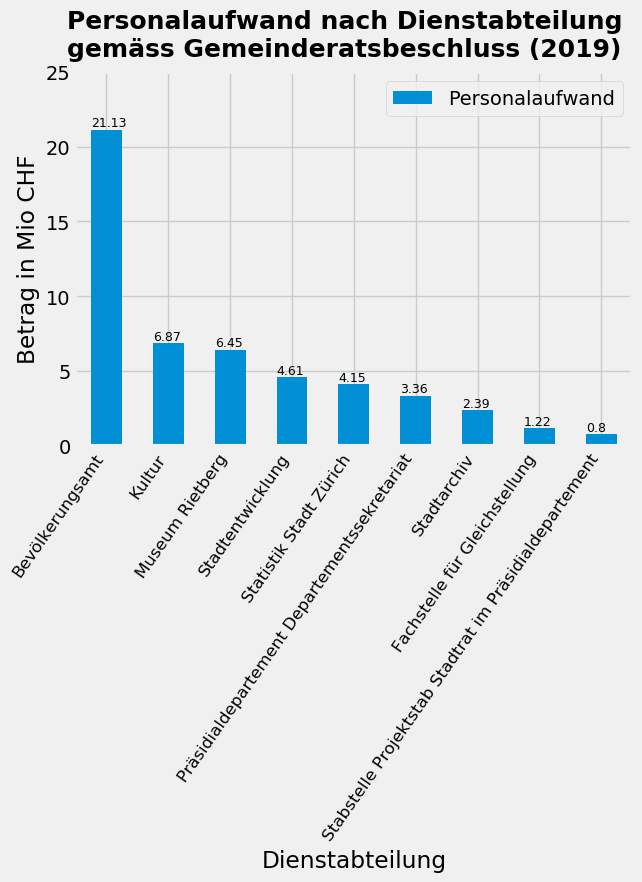

In [466]:
use_style('fivethirtyeight')

fig, ax = plt.subplots()
fig.suptitle("Personalaufwand nach Dienstabteilung\ngemäss Gemeinderatsbeschluss (2019)", fontsize=18, fontweight='bold');
amount_pers.plot(kind='bar', y='betragInMio', x="inst_bezeichnung", label="Personalaufwand", ax=ax)
ax.set_ylim([0, 25])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: f"{x:_.0f}".replace('_', "\'"))
)
# display labels on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.2), fontsize=9, ha='left')

plt.setp(plt.gca().get_xticklabels(), rotation=55, horizontalalignment='right', fontsize=12)
ax.set_ylabel('Betrag in Mio CHF')
ax.set_xlabel('Dienstabteilung')
plt.subplots_adjust(top=0.85)
plt.show()

## Unteschied zu anderer Phase im Budgetprozess

Der städtische Budget- und Rechnungsprozess durchläuft eine Reihe von Phasen: Vom Voranschlag, über Nachträge im sogenannten Novemberbrief über das vom Gemeinderat beschlossene Budget sowie mehrere Runden mit Nachtragskrediten. Diese Phasen sind im API als Betragstypen abgebildet.

Wenn wir das Beispiel von oben nehmen, können wir z.B. die Differenz zur Rechnung anschauen:

In [467]:
key = dep.index[dep.kurzname == 'PRD'].tolist()[0]
params = {
    'departement': key,
    'jahr': 2019,
    'betragsTyp': 'RECHNUNG'
}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/sachkonto2stellig',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()
data

amountRechnung = pd.DataFrame(data['value'])
amountRechnung = amountRechnung.astype({'betrag': 'float64'})
amountRechnung = amountRechnung.astype({'sachkonto': 'int64'})
amountRechnung

,betrag,betragsTyp,institution,jahr,sachkonto
0,3246507.87,RECHNUNG,1500,2019,30
1,4359780.29,RECHNUNG,1505,2019,30
2,1228410.37,RECHNUNG,1506,2019,30
3,6818156.65,RECHNUNG,1510,2019,30
4,6820650.65,RECHNUNG,1520,2019,30
5,20698854.99,RECHNUNG,1530,2019,30
6,792589.77,RECHNUNG,1561,2019,30
7,2338676.15,RECHNUNG,1565,2019,30
8,4042466.13,RECHNUNG,1575,2019,30
9,298404.59,RECHNUNG,1500,2019,31


In [508]:
# merge amount, instistution and sachkonto
merged = amountRechnung.join(sachkonto, on='sachkonto').rename(columns={'Bezeichnung': 'sachkonto_bezeichnung'})
merged = merged.join(inst, on='institution').rename(columns={'bezeichnung': 'inst_bezeichnung'})
merged = merged[['jahr', 'betrag', 'betragsTyp', 'institution', 'kurzname', 'inst_bezeichnung', 'departement', 'sachkonto', 'sachkonto_bezeichnung']]
merged

,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung
0,2019,3246507.87,RECHNUNG,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand
1,2019,4359780.29,RECHNUNG,1505,STE,Stadtentwicklung,15,30,Personalaufwand
2,2019,1228410.37,RECHNUNG,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand
3,2019,6818156.65,RECHNUNG,1510,KTR,Kultur,15,30,Personalaufwand
4,2019,6820650.65,RECHNUNG,1520,MRZ,Museum Rietberg,15,30,Personalaufwand
5,2019,20698854.99,RECHNUNG,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand
6,2019,792589.77,RECHNUNG,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand
7,2019,2338676.15,RECHNUNG,1565,SAR,Stadtarchiv,15,30,Personalaufwand
8,2019,4042466.13,RECHNUNG,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand
9,2019,298404.59,RECHNUNG,1500,PRD,Präsidialdepartement Departementssekretariat,15,31,Sach- und übriger Betriebsaufwand


In [510]:
amount_pr = merged[(merged.sachkonto_bezeichnung == 'Personalaufwand') & (merged.jahr == 2019)].reset_index(drop=True)
# copy sort order from amont_pers to this dataframe
amount_pr['inst_bezeichnung'] = pd.Categorical(amount_pr['inst_bezeichnung'], amount_pers['inst_bezeichnung'].tolist())
amount_pr = amount_pr.sort_values('inst_bezeichnung').reset_index(drop=True)

amount_pr['betragInMio'] = amount_pr.apply(lambda row: round(row.betrag / 1000000, 2), axis = 1)
amount_pr

,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung,betragInMio
0,2019,20698854.99,RECHNUNG,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand,20.70
1,2019,6818156.65,RECHNUNG,1510,KTR,Kultur,15,30,Personalaufwand,6.82
2,2019,6820650.65,RECHNUNG,1520,MRZ,Museum Rietberg,15,30,Personalaufwand,6.82
3,2019,4359780.29,RECHNUNG,1505,STE,Stadtentwicklung,15,30,Personalaufwand,4.36
4,2019,4042466.13,RECHNUNG,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand,4.04
5,2019,3246507.87,RECHNUNG,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand,3.25
6,2019,2338676.15,RECHNUNG,1565,SAR,Stadtarchiv,15,30,Personalaufwand,2.34
7,2019,1228410.37,RECHNUNG,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand,1.23
8,2019,792589.77,RECHNUNG,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand,0.79


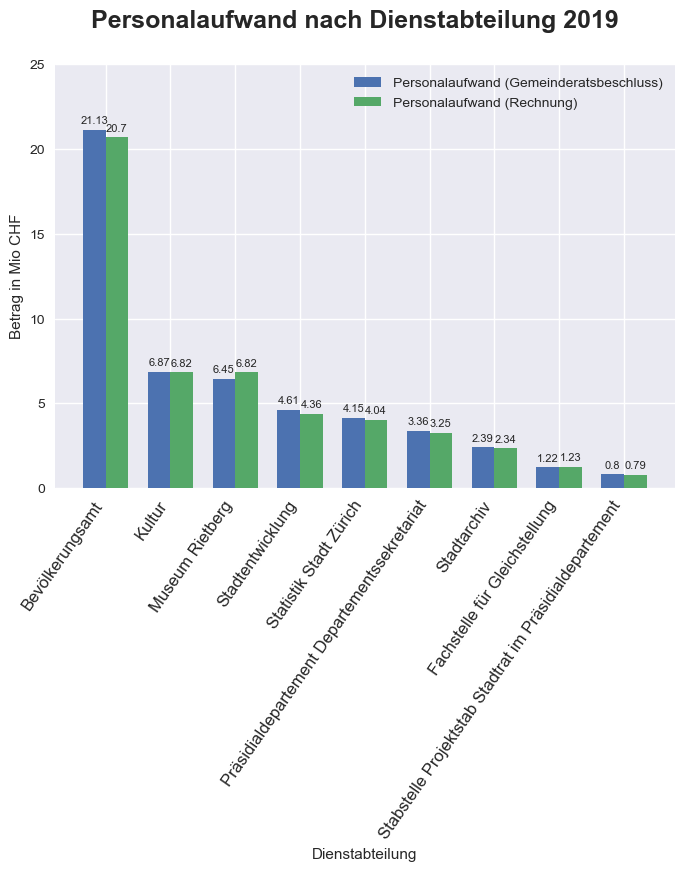

In [511]:
use_style('seaborn')

labels = amount_pr['inst_bezeichnung'].tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.suptitle("Personalaufwand nach Dienstabteilung 2019", fontsize=18, fontweight='bold');
rects1 = ax.bar(x - width/2, amount_pers['betragInMio'].tolist(), width, label="Personalaufwand (Gemeinderatsbeschluss)")
rects2 = ax.bar(x + width/2, amount_pr['betragInMio'].tolist(), width, label='Personalaufwand (Rechnung)')

ax.set_ylim([0, 25])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: f"{x:_.0f}".replace('_', "\'"))
)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Betrag in Mio CHF')
ax.set_xlabel('Dienstabteilung')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(rects1)
autolabel(rects2)

plt.setp(plt.gca().get_xticklabels(), rotation=55, horizontalalignment='right', fontsize=12)
plt.show()